In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

In [3]:
df = pd.read_csv('../results.csv')

In [4]:
df['FN'] = 137 - df['TP']
columns = ['ModelType',
 'Symbol',
 'Lags',
 'BatchSize',
 'Epoch',
 'TP',
 'FN',
 'FP',
 'TN',
 'Accuracy',
 'Precision',
 'Recall',
 'FPR',
 'TPR/FPR',
 'F1']
df = df[columns]
df

,ModelType,Symbol,Lags,BatchSize,Epoch,TP,FN,FP,TN,Accuracy,Precision,Recall,FPR,TPR/FPR,F1
0,DNN1,^SPX,5,32,0,137,0,113,0,0.548000,0.548000,1.000000,1.000000,1.000000,0.708010
1,DNN1,^SPX,5,32,10,137,0,113,0,0.548000,0.548000,1.000000,1.000000,1.000000,0.708010
2,DNN1,^SPX,5,32,20,137,0,113,0,0.548000,0.548000,1.000000,1.000000,1.000000,0.708010
3,DNN1,^SPX,5,32,30,137,0,113,0,0.548000,0.548000,1.000000,1.000000,1.000000,0.708010
4,DNN1,^SPX,5,32,40,137,0,113,0,0.548000,0.548000,1.000000,1.000000,1.000000,0.708010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2371,TNN3,^BET,20,1024,60,73,64,54,54,0.512097,0.574803,0.521429,0.500001,1.042855,0.546816
2372,TNN3,^BET,20,1024,70,83,54,63,45,0.516129,0.568493,0.592857,0.583334,1.016325,0.580419
2373,TNN3,^BET,20,1024,80,86,51,57,51,0.552419,0.601399,0.614286,0.527779,1.163908,0.607773
2374,TNN3,^BET,20,1024,90,78,59,51,57,0.544355,0.604651,0.557143,0.472223,1.179829,0.579925


In [5]:
spx = df[df['Symbol'] == '^SPX']
dax = df[df['Symbol'] == '^DAX']
bet = df[df['Symbol'] == '^BET']

In [6]:
spx

,ModelType,Symbol,Lags,BatchSize,Epoch,TP,FN,FP,TN,Accuracy,Precision,Recall,FPR,TPR/FPR,F1
0,DNN1,^SPX,5,32,0,137,0,113,0,0.548,0.548000,1.000000,1.000000,1.000000,0.708010
1,DNN1,^SPX,5,32,10,137,0,113,0,0.548,0.548000,1.000000,1.000000,1.000000,0.708010
2,DNN1,^SPX,5,32,20,137,0,113,0,0.548,0.548000,1.000000,1.000000,1.000000,0.708010
3,DNN1,^SPX,5,32,30,137,0,113,0,0.548,0.548000,1.000000,1.000000,1.000000,0.708010
4,DNN1,^SPX,5,32,40,137,0,113,0,0.548,0.548000,1.000000,1.000000,1.000000,0.708010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,TNN3,^SPX,20,1024,60,92,45,84,29,0.484,0.522727,0.671533,0.743364,0.903370,0.587859
2306,TNN3,^SPX,20,1024,70,102,35,80,33,0.540,0.560440,0.744526,0.707966,1.051641,0.639498
2307,TNN3,^SPX,20,1024,80,102,35,76,37,0.556,0.573034,0.744526,0.672567,1.106990,0.647619
2308,TNN3,^SPX,20,1024,90,95,42,85,28,0.492,0.527778,0.693431,0.752213,0.921854,0.599369


In [7]:
def show_strategy(points):
    if type(points) == int:
        points = [points]
    for point in points:
        model = df.iloc[point]
        path = os.path.join("../models", model["ModelType"], model["Symbol"], "lags", f"all_returns_batch_size_{model['BatchSize']}_epoch_{model['Epoch']}.png")
        img = Image.open(path)
        display(img)
        print(path)

In [8]:
def plot_roc(points, to_plot=5, legend=True):
    if type(points) == np.int64 or type(points) == int:
        points = [points]
    plt.figure()
    idx = 0
    for p in points:
        point = df.iloc[p]
        plt.scatter(point['FPR'], point['Recall'], label=f'{point["ModelType"]}_lags_{point["Lags"]}_batch_size_{point["BatchSize"]}')
        idx += 1
        if idx == to_plot:
            break
    plt.plot(np.linspace(0, 1, 10), np.linspace(0, 1, 10), 'r--', label='Random Classifier')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('ROC Curve')
    if legend:
        plt.legend()
    plt.grid()

In [9]:
def relevant(df):
    return df[(df['TP'] > df['FN']) & (df['TN'] > 0) & (df['Epoch'] > 0)]

In [10]:
spx_tp = spx.sort_values('TP', ascending=False)
spx_fn = spx.sort_values('FN')
spx_fp = spx.sort_values('FP')
spx_tn = spx.sort_values('TN', ascending=False)
spx_acc = spx.sort_values('Accuracy', ascending=False)
spx_prec = spx.sort_values('Precision', ascending=False)
spx_recall = spx.sort_values('Recall', ascending=False)
spx_f1 = spx.sort_values('F1', ascending=False)
spx_fpr = spx.sort_values('FPR')
spx_roc = spx.sort_values('TPR/FPR', ascending=False)

In [11]:
dax_tp = dax.sort_values('TP', ascending=False)
dax_fn = dax.sort_values('FN')
dax_fp = dax.sort_values('FP')
dax_tn = dax.sort_values('TN', ascending=False)
dax_acc = dax.sort_values('Accuracy', ascending=False)
dax_prec = dax.sort_values('Precision', ascending=False)
dax_recall = dax.sort_values('Recall', ascending=False)
dax_f1 = dax.sort_values('F1', ascending=False)
dax_fpr = dax.sort_values('FPR')
dax_roc = dax.sort_values('TPR/FPR', ascending=False)

In [12]:
bet_tp = bet.sort_values('TP', ascending=False)
bet_fn = bet.sort_values('FN')
bet_fp = bet.sort_values('FP')
bet_tn = bet.sort_values('TN', ascending=False)
bet_acc = bet.sort_values('Accuracy', ascending=False)
bet_prec = bet.sort_values('Precision', ascending=False)
bet_recall = bet.sort_values('Recall', ascending=False)
bet_f1 = bet.sort_values('F1', ascending=False)
bet_fpr = bet.sort_values('FPR')
bet_roc = bet.sort_values('TPR/FPR', ascending=False)

In [13]:
n_relevant = 5

r = relevant(spx_prec)[:n_relevant]
r

,ModelType,Symbol,Lags,BatchSize,Epoch,TP,FN,FP,TN,Accuracy,Precision,Recall,FPR,TPR/FPR,F1
1214,GRU1,^SPX,20,32,40,76,61,50,63,0.556,0.603175,0.554745,0.442479,1.253720,0.577946
1307,GRU1,^SPX,10,1024,90,116,21,79,34,0.600,0.594872,0.846715,0.699116,1.211123,0.698795
1198,GRU1,^SPX,5,32,99,88,49,60,53,0.564,0.594595,0.642336,0.530974,1.209730,0.617543
2203,TNN3,^SPX,20,32,30,97,40,67,46,0.572,0.591463,0.708029,0.592921,1.194137,0.644518
1195,GRU1,^SPX,5,32,70,100,37,70,43,0.572,0.588235,0.729927,0.619470,1.178309,0.651465


In [14]:
r.to_csv('relevant.csv')

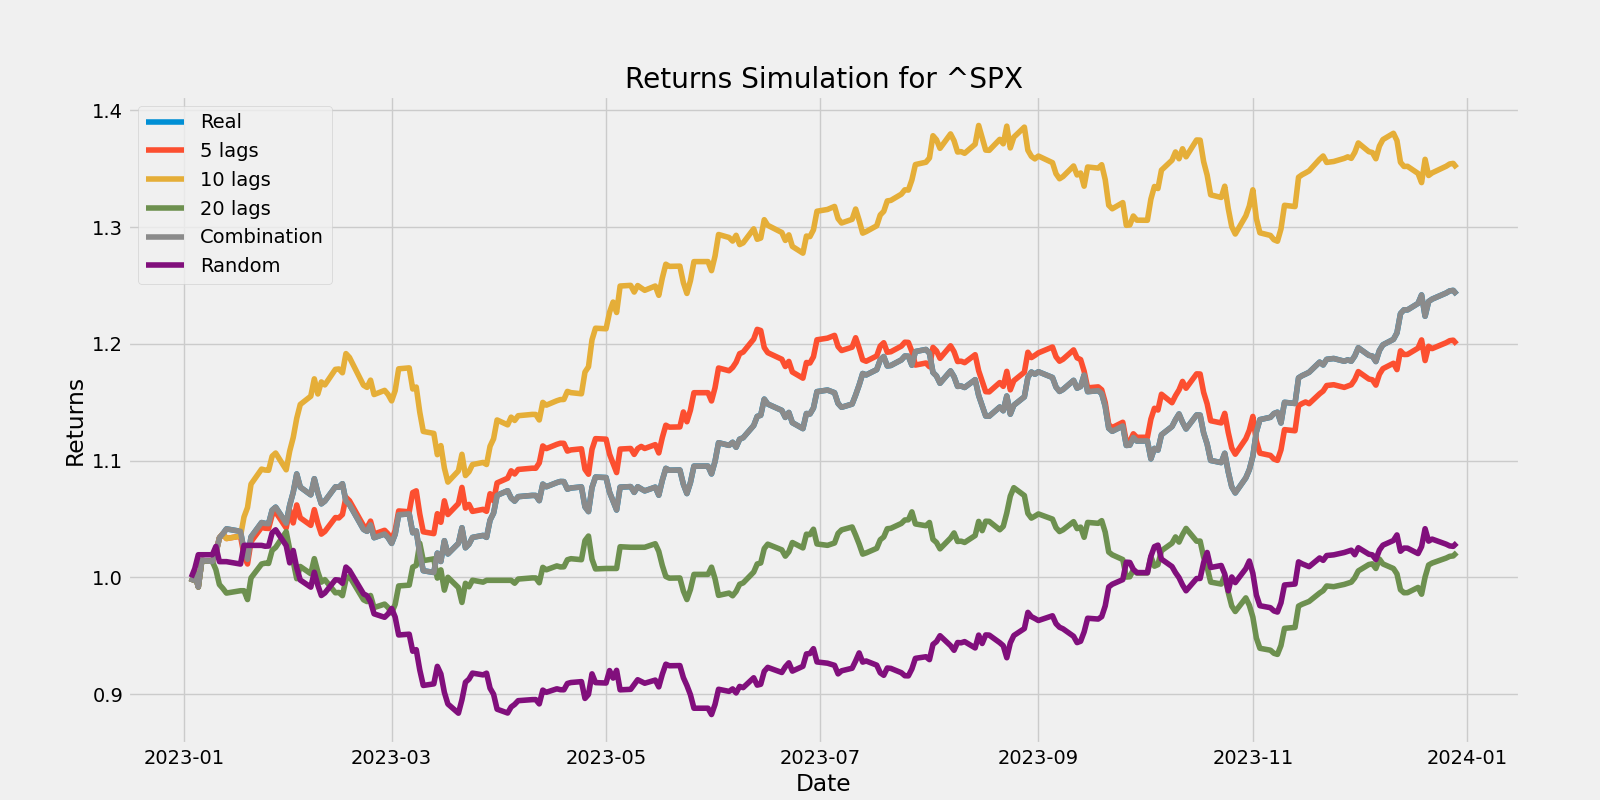

../models/GRU1/^SPX/lags/all_returns_batch_size_32_epoch_40.png


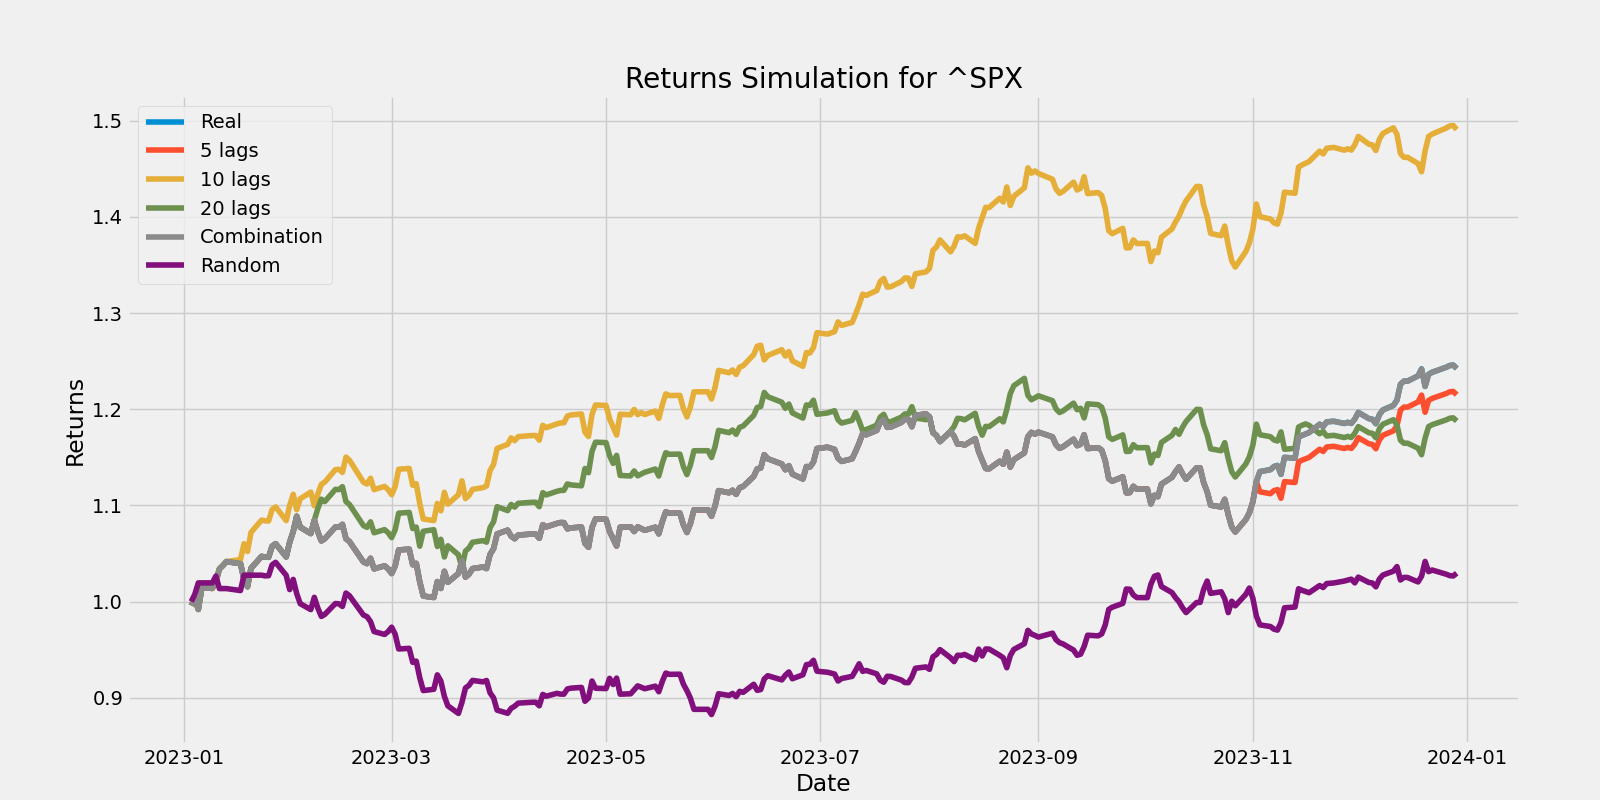

../models/GRU1/^SPX/lags/all_returns_batch_size_1024_epoch_90.png


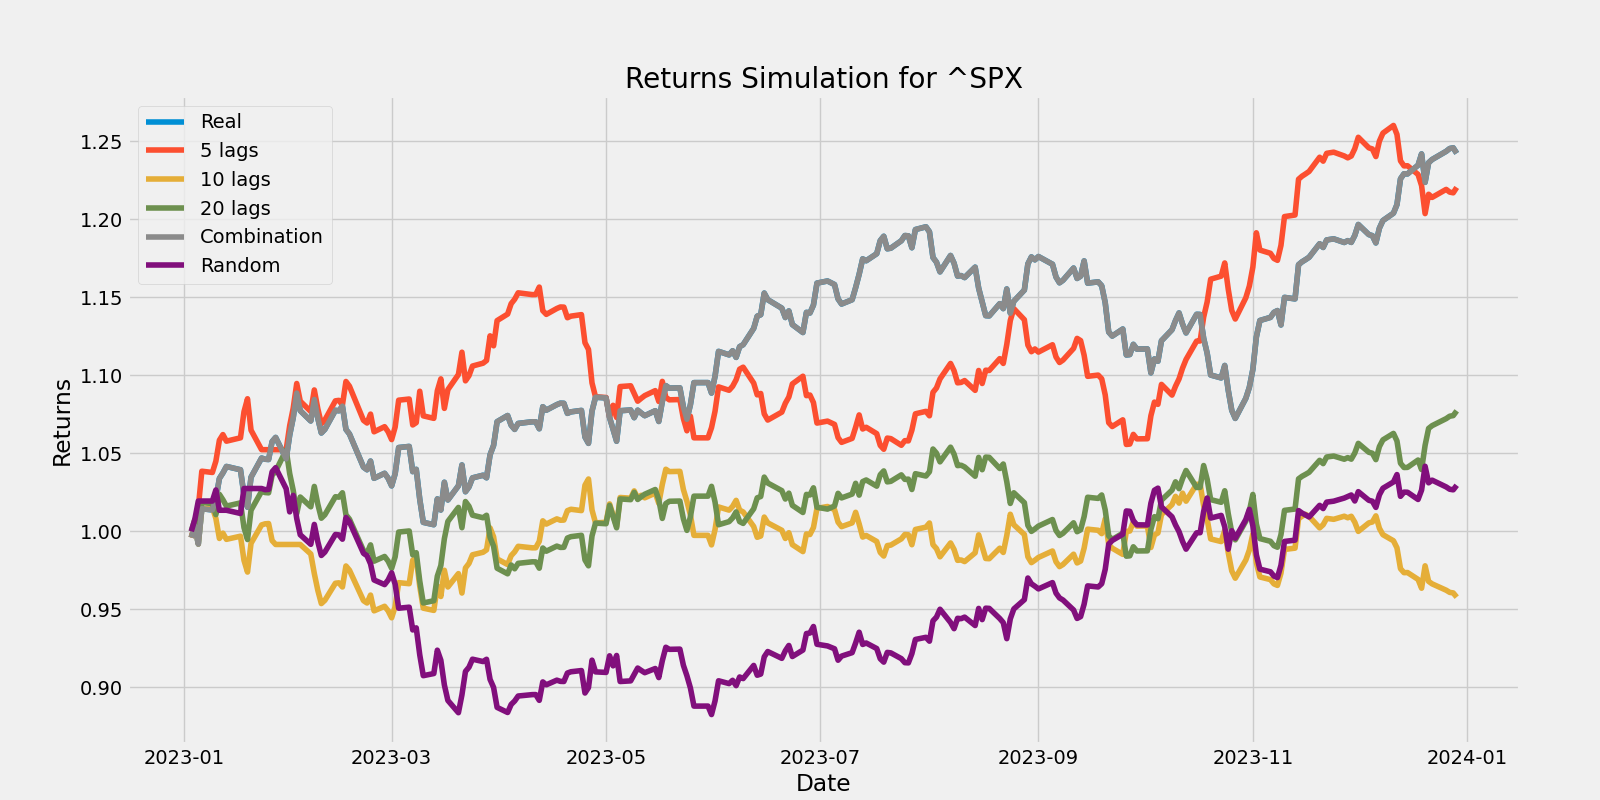

../models/GRU1/^SPX/lags/all_returns_batch_size_32_epoch_99.png


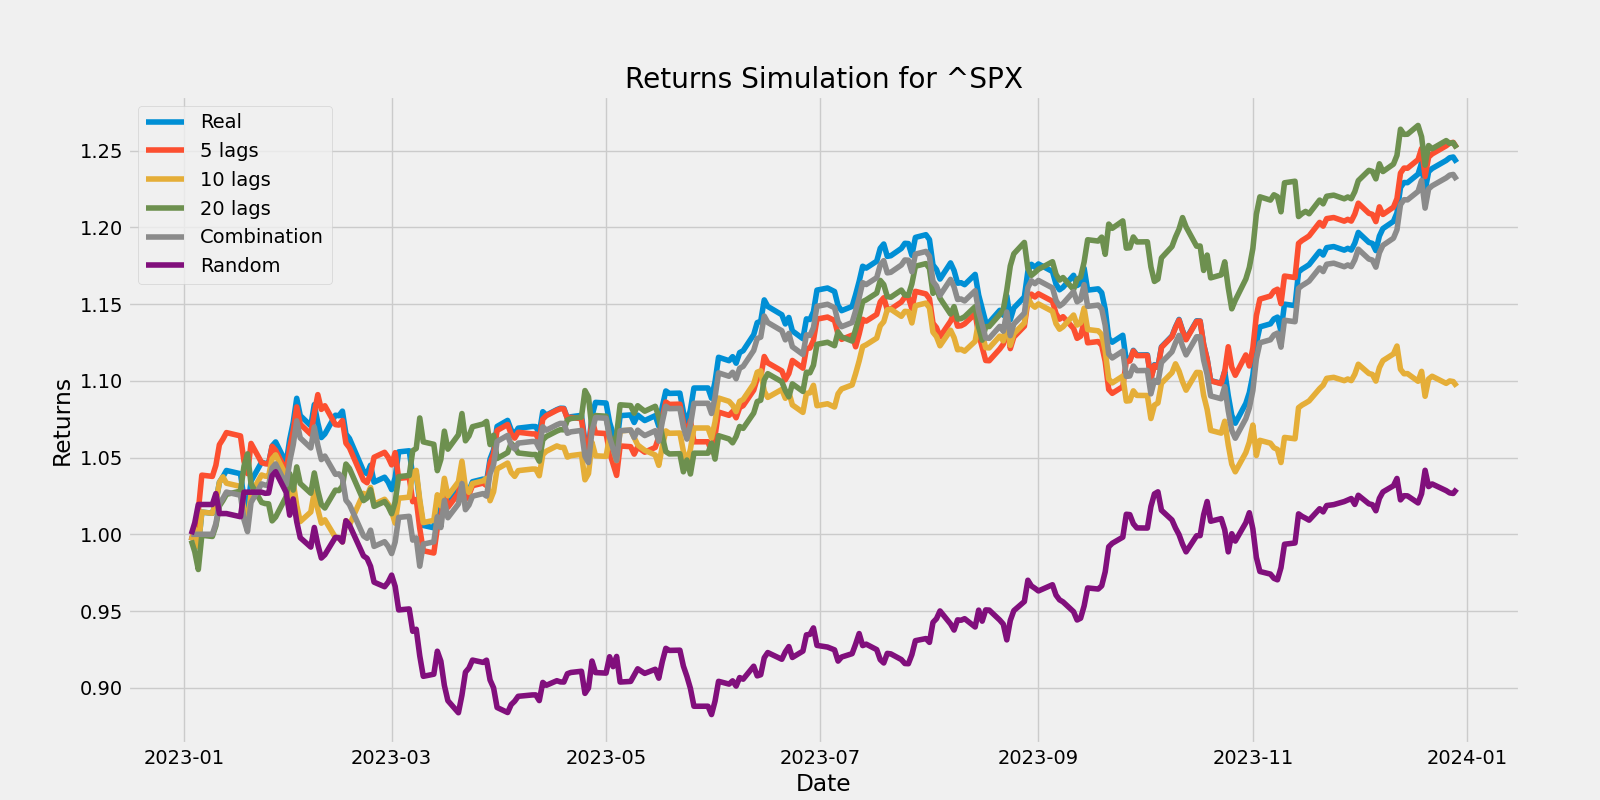

../models/TNN3/^SPX/lags/all_returns_batch_size_32_epoch_30.png


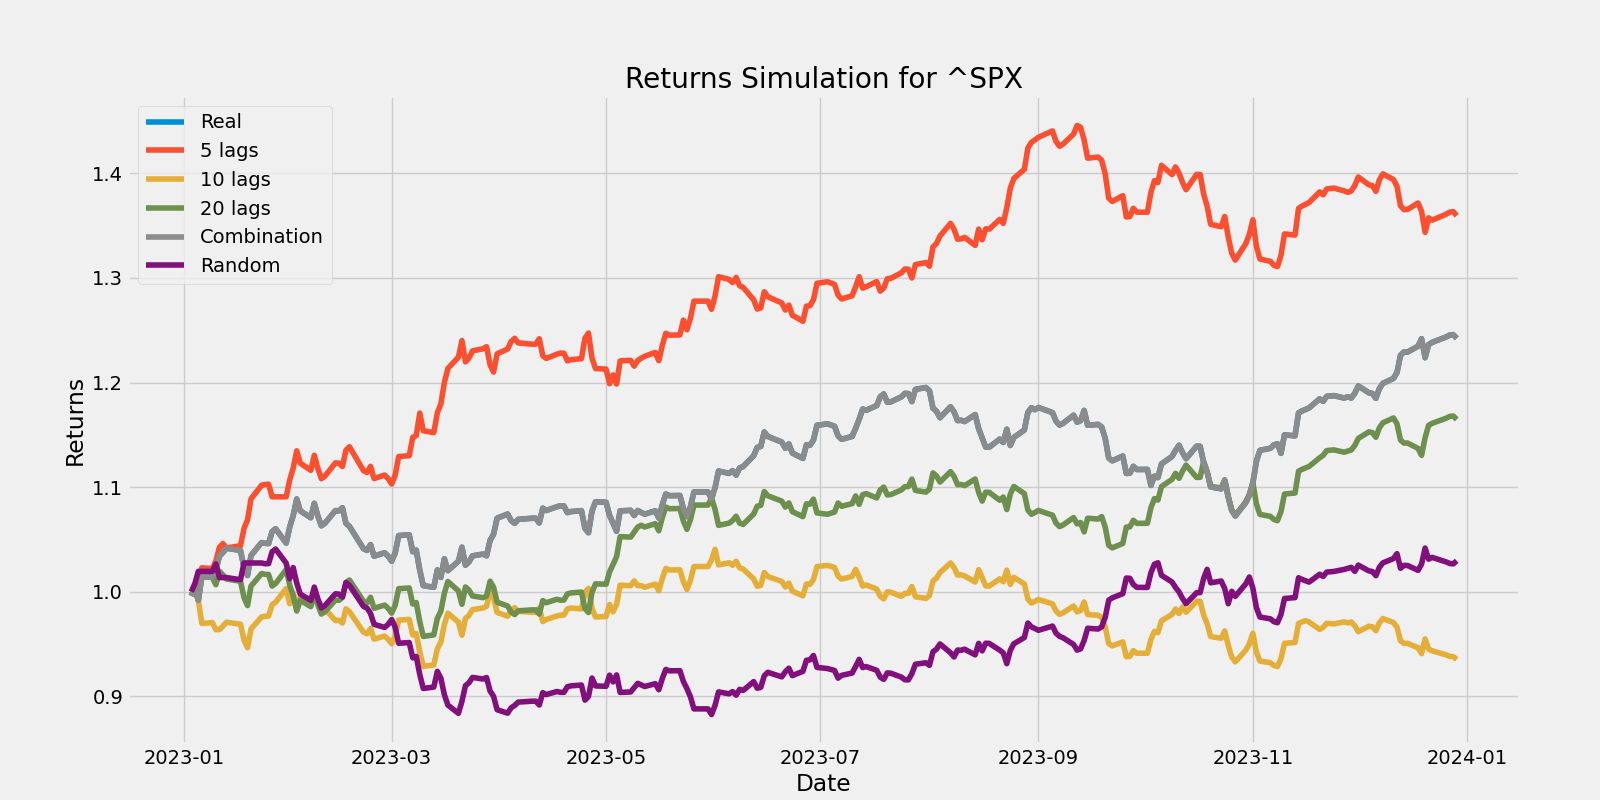

../models/GRU1/^SPX/lags/all_returns_batch_size_32_epoch_70.png


In [15]:
show_strategy(r.index)

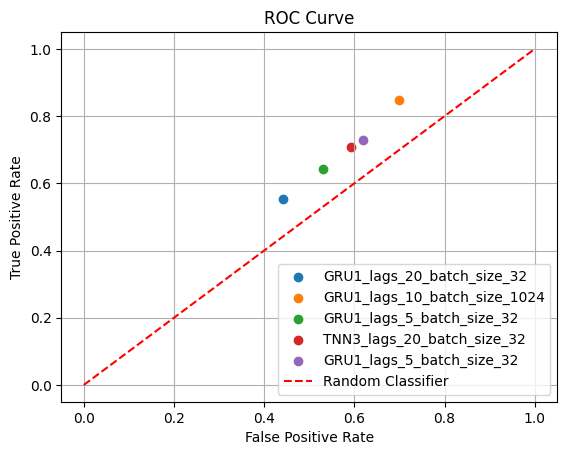

In [16]:
plot_roc(r.index)

In [17]:
s1 = relevant(spx_prec)[:n_relevant+5].value_counts(['ModelType', 'BatchSize', 'Lags'])
s1

ModelType  BatchSize  Lags
GRU1       32         5       3
GRU2       32         20      2
TNN3       32         20      2
GRU1       32         20      1
           1024       10      1
TNN2       32         20      1
Name: count, dtype: int64

In [18]:
s2 = relevant(dax_prec)[:n_relevant+5].value_counts(['ModelType', 'BatchSize', 'Lags'])
s2

ModelType  BatchSize  Lags
GRU2       32         10      3
TNN2       1024       20      3
LSTM2      32         10      2
                      20      1
TNN3       1024       20      1
Name: count, dtype: int64

In [19]:
s3 = relevant(bet_prec)[:n_relevant+5].value_counts(['ModelType', 'BatchSize', 'Lags'])
s3

ModelType  BatchSize  Lags
TNN3       1024       10      3
           32         10      2
GRU2       32         5       1
LSTM1      32         10      1
LSTM2      32         10      1
TNN1       32         5       1
TNN3       1024       20      1
Name: count, dtype: int64

In [20]:
res = pd.concat((s1, s2, s2))
res

ModelType  BatchSize  Lags
GRU1       32         5       3
GRU2       32         20      2
TNN3       32         20      2
GRU1       32         20      1
           1024       10      1
TNN2       32         20      1
GRU2       32         10      3
TNN2       1024       20      3
LSTM2      32         10      2
                      20      1
TNN3       1024       20      1
GRU2       32         10      3
TNN2       1024       20      3
LSTM2      32         10      2
                      20      1
TNN3       1024       20      1
Name: count, dtype: int64

In [21]:
grouped = res.groupby(['ModelType', 'BatchSize', 'Lags']).sum().sort_values(ascending=False)
grouped

ModelType  BatchSize  Lags
GRU2       32         10      6
TNN2       1024       20      6
LSTM2      32         10      4
GRU1       32         5       3
GRU2       32         20      2
LSTM2      32         20      2
TNN3       32         20      2
           1024       20      2
GRU1       32         20      1
           1024       10      1
TNN2       32         20      1
Name: count, dtype: int64

In [22]:
powerful = grouped.index[:n_relevant]
powerful

MultiIndex([( 'GRU2',   32, 10),
            ( 'TNN2', 1024, 20),
            ('LSTM2',   32, 10),
            ( 'GRU1',   32,  5),
            ( 'GRU2',   32, 20)],
           names=['ModelType', 'BatchSize', 'Lags'])

In [23]:
types = []
batch_sizes = []
lags = []
for power in powerful:
    model_type, batch_size, lag = power
    types.append(model_type)
    batch_sizes.append(batch_size)
    lags.append(lag)
print(types)
print(batch_sizes)
print(lags)

['GRU2', 'TNN2', 'LSTM2', 'GRU1', 'GRU2']
[32, 1024, 32, 32, 32]
[10, 20, 10, 5, 20]


In [24]:
good_df = []
for elem1, elem2, elem3 in zip(types, batch_sizes, lags):
    filtered = df[(df['ModelType'] == elem1) & (df['BatchSize'] == elem2) & (df['Lags'] == elem3)]
    good_df.append(filtered)
good_df = pd.concat(good_df)
good_df

,ModelType,Symbol,Lags,BatchSize,Epoch,TP,FN,FP,TN,Accuracy,Precision,Recall,FPR,TPR/FPR,F1
1397,GRU2,^SPX,10,32,0,137,0,113,0,0.548000,0.548000,1.000000,1.000001,0.999999,0.708010
1398,GRU2,^SPX,10,32,10,137,0,113,0,0.548000,0.548000,1.000000,1.000001,0.999999,0.708010
1399,GRU2,^SPX,10,32,20,127,10,106,7,0.536000,0.545064,0.927007,0.938054,0.988224,0.686486
1400,GRU2,^SPX,10,32,30,100,37,80,33,0.532000,0.555556,0.729927,0.707966,1.031020,0.630914
1401,GRU2,^SPX,10,32,40,97,40,78,35,0.528000,0.554286,0.708029,0.690266,1.025733,0.621794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,GRU2,^BET,20,32,60,86,51,69,39,0.504032,0.554839,0.614286,0.638890,0.961489,0.583050
1481,GRU2,^BET,20,32,70,82,55,60,48,0.524194,0.577465,0.585714,0.555557,1.054284,0.581560
1482,GRU2,^BET,20,32,80,81,56,66,42,0.495968,0.551020,0.578571,0.611112,0.946752,0.564459
1483,GRU2,^BET,20,32,90,71,66,61,47,0.475806,0.537879,0.507143,0.564816,0.897891,0.522058


In [25]:
good_df.sort_values('Precision', ascending=False)

,ModelType,Symbol,Lags,BatchSize,Epoch,TP,FN,FP,TN,Accuracy,Precision,Recall,FPR,TPR/FPR,F1
2139,TNN2,^DAX,20,1024,50,74,63,44,71,0.568627,0.627119,0.528571,0.382610,1.381490,0.573643
873,LSTM2,^BET,10,32,40,93,44,58,50,0.576613,0.615894,0.664286,0.537038,1.236944,0.639175
842,LSTM2,^DAX,10,32,60,80,57,50,65,0.568627,0.615385,0.571429,0.434784,1.314283,0.592592
2141,TNN2,^DAX,20,1024,70,89,48,56,59,0.580392,0.613793,0.635714,0.486958,1.305482,0.624561
841,LSTM2,^DAX,10,32,50,77,60,49,66,0.560784,0.611111,0.550000,0.426088,1.290813,0.578947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,GRU2,^DAX,20,32,60,70,67,64,51,0.474510,0.522388,0.500000,0.556523,0.898436,0.510948
837,LSTM2,^DAX,10,32,10,101,36,95,20,0.474510,0.515306,0.721429,0.826088,0.873307,0.601190
838,LSTM2,^DAX,10,32,20,74,63,71,44,0.462745,0.510345,0.528571,0.617392,0.856135,0.519298
1431,GRU2,^DAX,10,32,10,82,55,80,35,0.458824,0.506173,0.585714,0.695653,0.841963,0.543046


In [26]:
good_df.loc[good_df.groupby(['ModelType', 'Symbol', 'Lags', 'BatchSize'])['Precision'].idxmax()]

,ModelType,Symbol,Lags,BatchSize,Epoch,TP,FN,FP,TN,Accuracy,Precision,Recall,FPR,TPR/FPR,F1
1259,GRU1,^BET,5,32,50,116,21,86,22,0.556452,0.574257,0.828571,0.796297,1.040530,0.678362
1228,GRU1,^DAX,5,32,70,79,58,58,57,0.533333,0.576642,0.564286,0.504349,1.118840,0.570397
1198,GRU1,^SPX,5,32,99,88,49,60,53,0.564000,0.594595,0.642336,0.530974,1.209730,0.617543
1468,GRU2,^BET,10,32,50,88,49,63,45,0.536290,0.582781,0.628571,0.583334,1.077549,0.604810
1476,GRU2,^BET,20,32,20,127,10,92,16,0.576613,0.579909,0.907143,0.851853,1.064906,0.707520
1436,GRU2,^DAX,10,32,60,69,68,44,71,0.549020,0.610619,0.492857,0.382610,1.288146,0.545454
1443,GRU2,^DAX,20,32,20,76,61,58,57,0.521569,0.567164,0.542857,0.504349,1.076353,0.554744
1403,GRU2,^SPX,10,32,60,101,36,75,38,0.556000,0.573864,0.737226,0.663718,1.110753,0.645367
1418,GRU2,^SPX,20,32,99,85,52,60,53,0.552000,0.586207,0.620438,0.530974,1.168489,0.602836
873,LSTM2,^BET,10,32,40,93,44,58,50,0.576613,0.615894,0.664286,0.537038,1.236944,0.639175


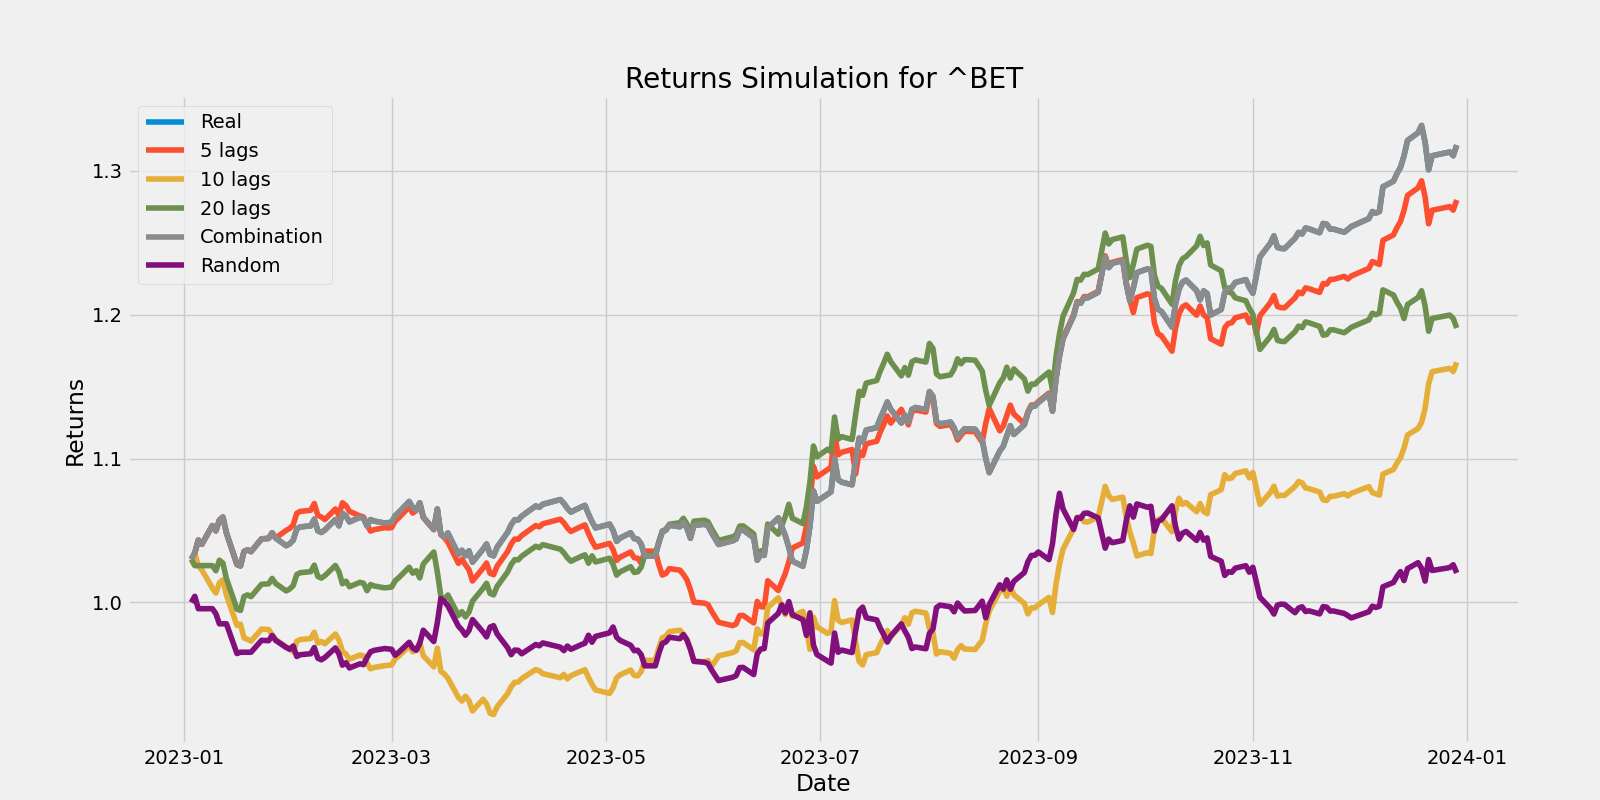

../models/GRU1/^BET/lags/all_returns_batch_size_32_epoch_50.png


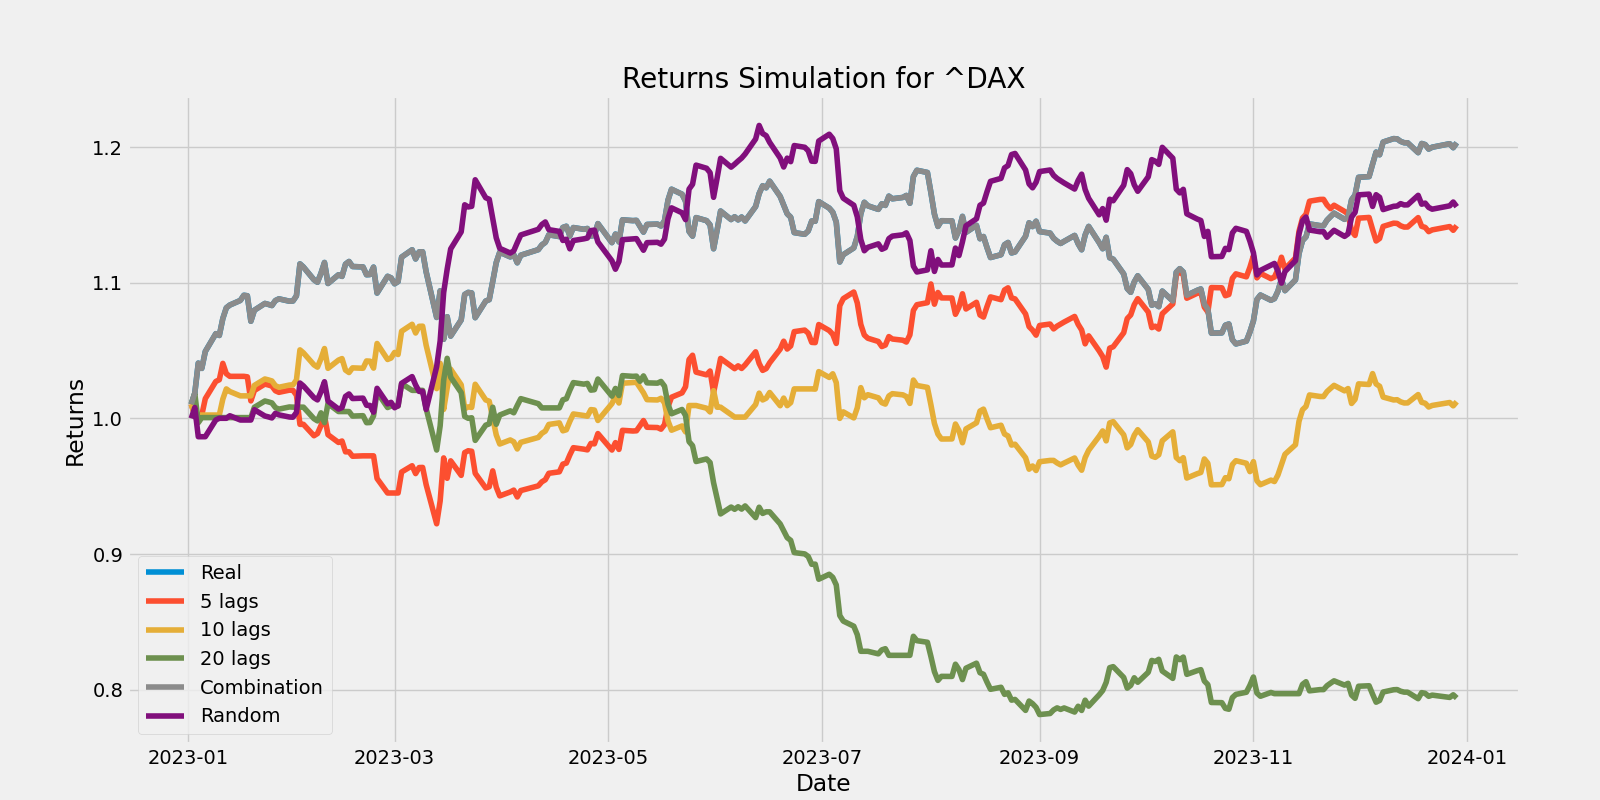

../models/GRU1/^DAX/lags/all_returns_batch_size_32_epoch_70.png


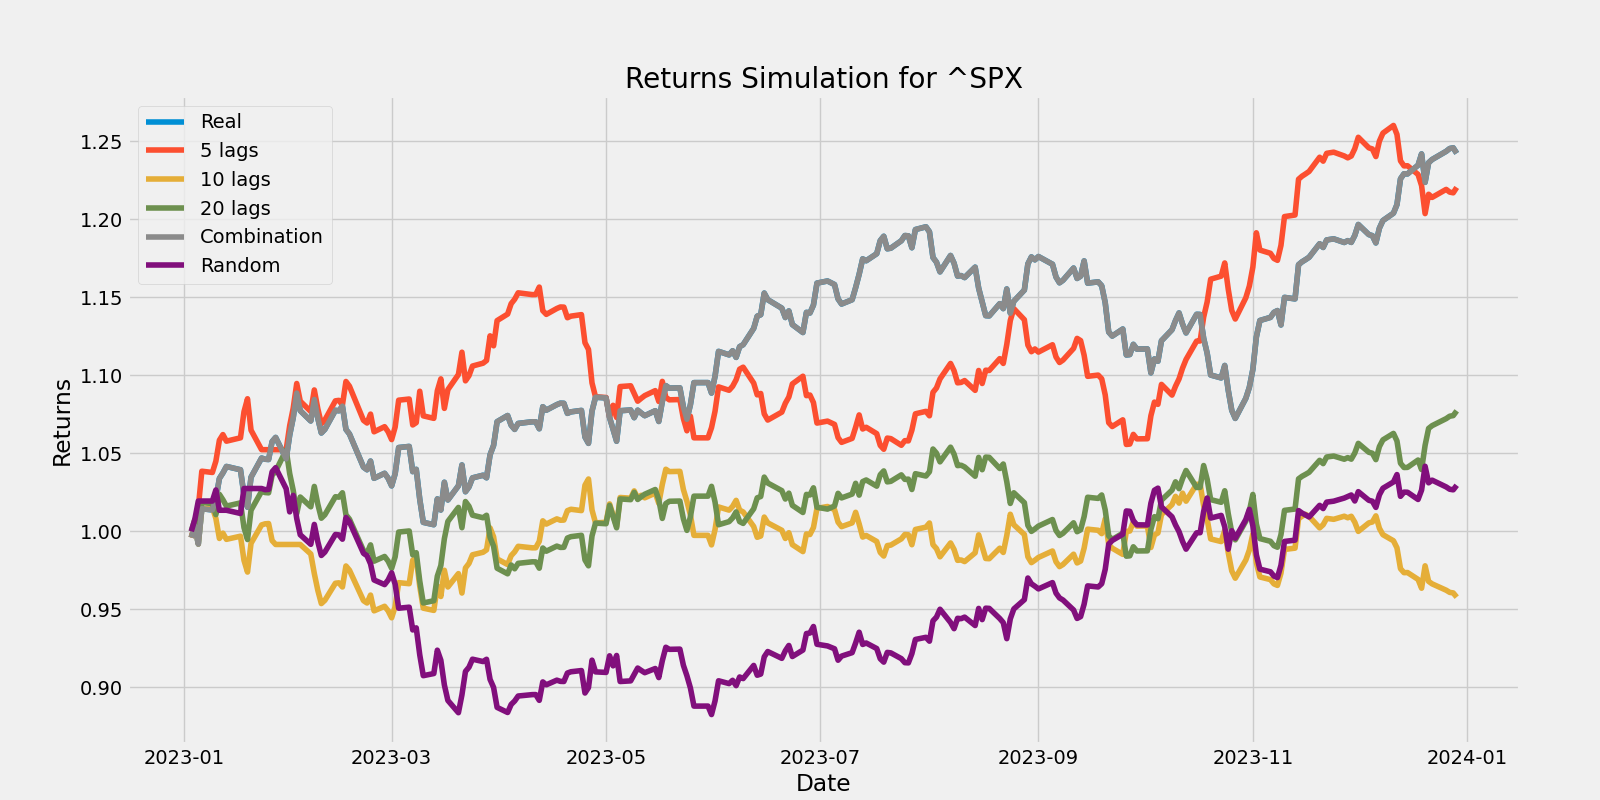

../models/GRU1/^SPX/lags/all_returns_batch_size_32_epoch_99.png


In [32]:
show_strategy([1259,1228,1198])

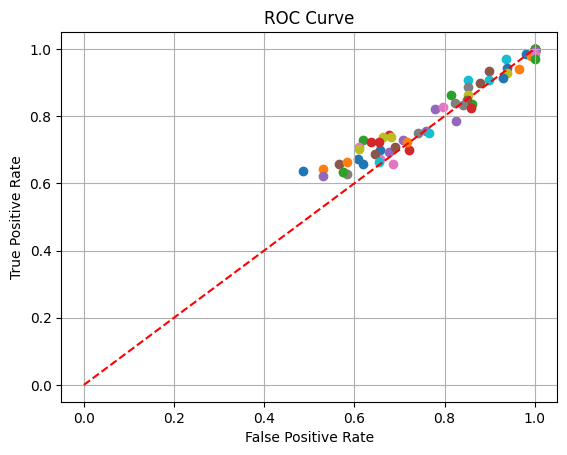

In [40]:
plot_roc(good_stuff.index, -1, False)

In [433]:
good_df[(good_df['Recall']>0.6) & (good_df['FPR'] < 0.5)]

,ModelType,Symbol,Lags,BatchSize,Epoch,TP,FN,FP,TN,Accuracy,Precision,Recall,FPR,TPR/FPR,F1
1462,GRU2,^BET,5,32,99,93,44,52,56,0.600806,0.641379,0.664286,0.481482,1.379667,0.652631
2141,TNN2,^DAX,20,1024,70,89,48,56,59,0.580392,0.613793,0.635714,0.486958,1.305482,0.624561


In [30]:
plt.rcParams['axes.prop_cycle']

'#1f77b4'
'#ff7f0e'
'#2ca02c'
'#d62728'
'#9467bd'
'#8c564b'
'#e377c2'
'#7f7f7f'
'#bcbd22'
'#17becf'
